In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:

workouts = pd.read_csv("../data/megaGymDataset.csv")
users = pd.read_csv("../data/user_data.csv")
ratings = pd.read_csv("../data/user_workout_ratings_full_bias.csv")

In [17]:
print("Workouts:", workouts.shape)
print("Users:", users.shape)
print("Ratings:", ratings.shape)


Workouts: (2918, 9)
Users: (1000, 12)
Ratings: (60000, 3)


In [18]:
display(workouts.head())
display(users.head())
display(ratings.head())

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


,user_id,age,gender,height_cm,weight_kg,fitness_level,goal,workout_frequency,preferred_type,equipment_access,preferred_bodypart,time_per_session
0,user_1,47,Other,193,53,Beginner,Improve flexibility,3,HIIT High Intensity Interval Training,"Dumbbell, Machine",Full body,28
1,user_2,28,Female,167,63,Intermediate,Prepare for event,3,Powerlifting,"Home gym, Cable",Biceps,74
2,user_3,28,Female,177,74,Intermediate,Injury recovery,1,Cardio running,"Minimal equipment, Home gym, Cable",Quads,68
3,user_4,44,Male,168,68,Expert,Gain mass,2,Olympic weightlifting,"Minimal equipment, Full gym, Barbell",Chest,25
4,user_5,51,Other,170,66,Expert,Improve flexibility,4,Circuit training,"Minimal equipment, Bodyweight, Barbell",Upper body,56


,user_id,workout_id,rating
0,user_1,181,6.0
1,user_1,977,7.4
2,user_1,613,4.8
3,user_1,146,6.3
4,user_1,2800,5.5


In [19]:
print("Missing values:\n", workouts.isnull().sum())
print("Missing values:\n", users.isnull().sum())

Missing values:
 Unnamed: 0       0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64
Missing values:
 user_id                0
age                    0
gender                 0
height_cm              0
weight_kg              0
fitness_level          0
goal                   0
workout_frequency      0
preferred_type         0
equipment_access      19
preferred_bodypart     0
time_per_session       0
dtype: int64


In [20]:
workouts["Desc"].fillna("No description", inplace=True)
workouts["Equipment"].fillna("None", inplace=True)
workouts["Rating"].fillna(workouts["Rating"].mean(), inplace=True)

C:\Users\DEV\AppData\Local\Temp\ipykernel_23028\699915734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  workouts["Desc"].fillna("No description", inplace=True)
C:\Users\DEV\AppData\Local\Temp\ipykernel_23028\699915734.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [21]:
users["equipment_access"].fillna("None", inplace=True)

C:\Users\DEV\AppData\Local\Temp\ipykernel_23028\1647773283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users["equipment_access"].fillna("None", inplace=True)


Text(0.5, 1.0, 'Age Distribution')

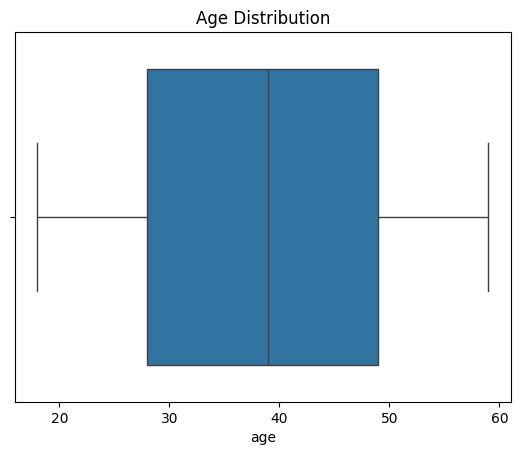

In [23]:
sns.boxplot(x=users["age"])
plt.title("Age Distribution")

Text(0.5, 1.0, 'Weight Distribution')

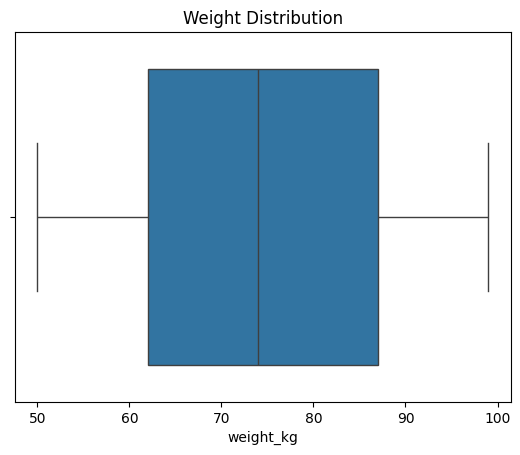

In [24]:
sns.boxplot(x=users["weight_kg"])
plt.title("Weight Distribution")

In [26]:
# --- A. Unique IDs
print("Unique user_ids:", users['user_id'].nunique())
print("Unique workout_ids:", workouts.shape[0])
print("Unique rating users:", ratings['user_id'].nunique())
print("Unique rating workouts:", ratings['workout_id'].nunique())

Unique user_ids: 1000
Unique workout_ids: 2918
Unique rating users: 1000
Unique rating workouts: 2918


Text(0.5, 1.0, 'Workout Type Distribution')

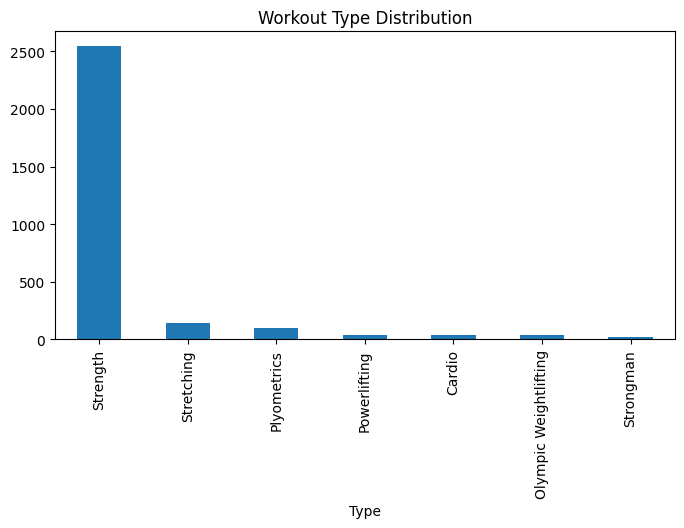

In [27]:
plt.figure(figsize=(8,4))
workouts["Type"].value_counts().plot(kind="bar")
plt.title("Workout Type Distribution")


Text(0.5, 1.0, 'Target Body Parts')

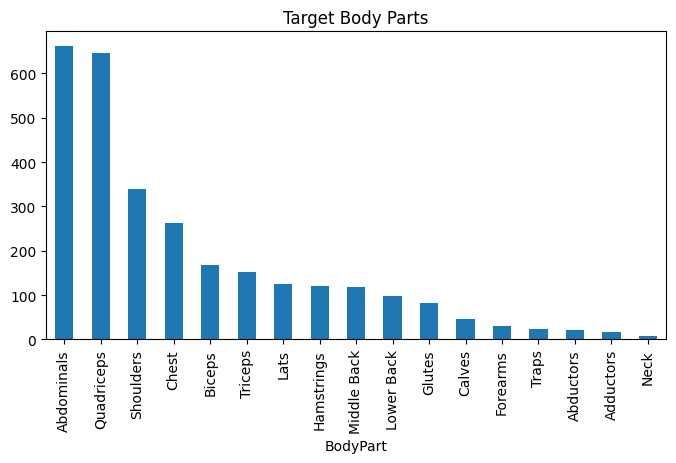

In [28]:
plt.figure(figsize=(8,4))
workouts["BodyPart"].value_counts().plot(kind="bar")
plt.title("Target Body Parts")

Text(0.5, 1.0, 'Ratings Distribution')

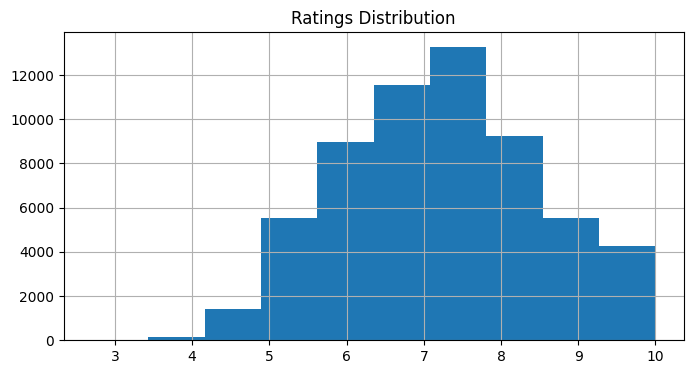

In [29]:
plt.figure(figsize=(8,4))
ratings["rating"].hist(bins=10)
plt.title("Ratings Distribution")

In [31]:
print("Unique users:", ratings["user_id"].nunique())
print("Unique workouts:", ratings["workout_id"].nunique())

print("Data cleaning and EDA completed.")

Unique users: 1000
Unique workouts: 2918
Data cleaning and EDA completed.
